In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [52]:
df = pd.read_csv(r'E:\Courses\Python\VS Code - Files\Loan Approval Analysis\loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [54]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [55]:
# Data Cleaning

df.duplicated(keep=False).sum()

0

In [56]:
df[' residential_assets_value'] = df[' residential_assets_value'].abs()

(df[' residential_assets_value'] < 0).sum()

0

In [57]:
df.columns = df.columns.str.strip()

df = df.map(lambda x: x.strip() if isinstance(x, str) else x)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [59]:
def cibil_rating (value): 
    if 300 <= value <= 549:
        return 'Poor'
    elif 550 <= value <= 649:
        return 'Average'
    elif 650 <= value <= 749:
        return 'Good'
    elif 750 <= value <= 900:
        return 'Excellent'
    else:
        return 'Error'
    
df['CIBIL Ratings'] = df['cibil_score'].apply(cibil_rating)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor


In [60]:
def income_levels (value): 
    if 100000 <= value <= 1000000:
        return 'Low'
    elif 1000001 <= value <= 4000000:
        return 'Lower-Middle'
    elif 4000001 <= value <= 7500000:
        return 'Upper-Middle'
    elif 7500001 <= value <= 10000000:
        return 'High'
    else:
        return 'Very High income'
    
df['Income levels'] = df['income_annum'].apply(income_levels)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings,Income levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High


In [61]:
def loan_rating (value): 
    if 100000 <= value <= 10000000:
        return 'Bronze'
    elif 10000001 <= value <= 20000000:
        return 'Silver'
    elif 20000001 <= value <= 30000000:
        return 'Gold'
    elif 30000001 <= value <= 40000000:
        return 'Platinum'
    else:
        return 'Unknown'
    
df['Loan Rating'] = df['loan_amount'].apply(loan_rating)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings,Income levels,Loan Rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold


In [62]:
def loan_term_range (value): 
    if 0 <= value <= 7:
        return 'Short-Term'
    elif 8 <= value <= 14:
        return 'Intermediate'
    elif 15 <= value <= 20:
        return 'Long-Term'
    else:
        return 'Unknown'
    
df['Loan-Term Range'] = df['loan_term'].apply(loan_term_range)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings,Income levels,Loan Rating,Loan-Term Range
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term


In [63]:
def dependents (value): 
    if 0 <= value <= 1:
        return 'Low'
    elif 2 <= value <= 3:
        return 'Moderate'
    elif 4 <= value <= 5:
        return 'High'
    else:
        return 'Unknown'
    
df['Dependent Levels'] = df['no_of_dependents'].apply(dependents)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings,Income levels,Loan Rating,Loan-Term Range,Dependent Levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [64]:
# EDA

income = df['Income levels'].value_counts().reset_index()
income = income.rename(columns={'count' : 'Number of Applicants'})
#print(income)
income.head()

,Income levels,Number of Applicants
0,Upper-Middle,1548
1,Lower-Middle,1284
2,High,1047
3,Low,390


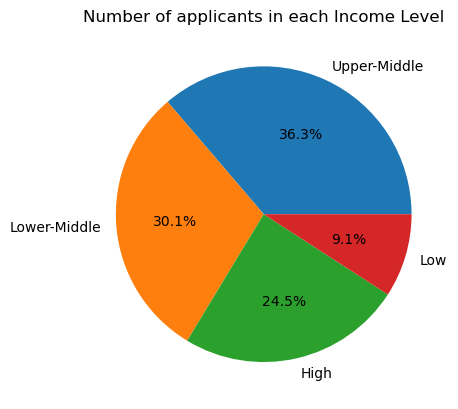

In [65]:
plt.pie(income['Number of Applicants'], labels=income['Income levels'], autopct='%1.1f%%')
plt.title('Number of applicants in each Income Level')
plt.show()

In [66]:
dependents = df['Dependent Levels'].value_counts().reset_index()
dependents = dependents.rename(columns={'count' : 'Number of Applicants'})

dependents.head()

,Dependent Levels,Number of Applicants
0,Moderate,1435
1,High,1425
2,Low,1409


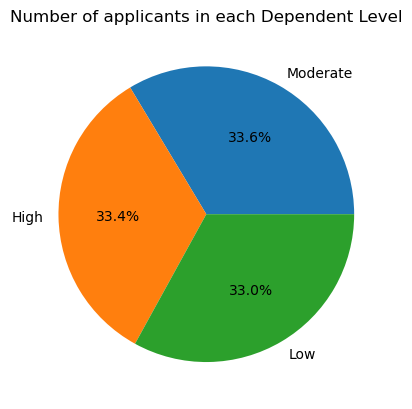

In [67]:
plt.pie(dependents['Number of Applicants'], labels=dependents['Dependent Levels'], autopct='%1.1f%%')
plt.title('Number of applicants in each Dependent Level')
plt.show()

In [68]:
education = df['education'].value_counts().reset_index()
education = education.rename(columns={'count' : 'Number of Applicants'})

education.head()

,education,Number of Applicants
0,Graduate,2144
1,Not Graduate,2125


In [69]:
employment = df['self_employed'].value_counts().reset_index()
employment = employment.rename(columns={'count' : 'Number of Applicants'})

employment.head()

,self_employed,Number of Applicants
0,Yes,2150
1,No,2119


In [70]:
loans = df['loan_status'].value_counts().reset_index()
loans = loans.rename(columns={'loan_status' : 'Loan Status','count' : 'Total'})

loans.head()

,Loan Status,Total
0,Approved,2656
1,Rejected,1613


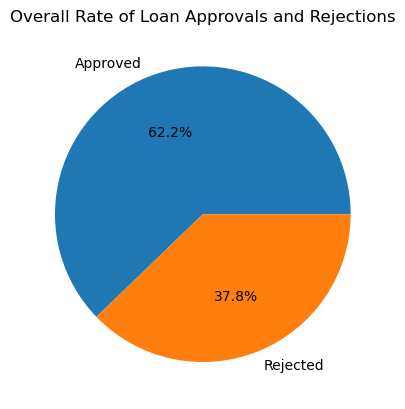

In [71]:
plt.pie(loans['Total'], labels=loans['Loan Status'], autopct='%1.1f%%')
plt.title('Overall Rate of Loan Approvals and Rejections')
plt.show()

In [72]:
education = df.groupby(['education', 'loan_status']).size().reset_index()
education = education[education['loan_status'].isin({'Approved', 'Rejected'})]
education.head()

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


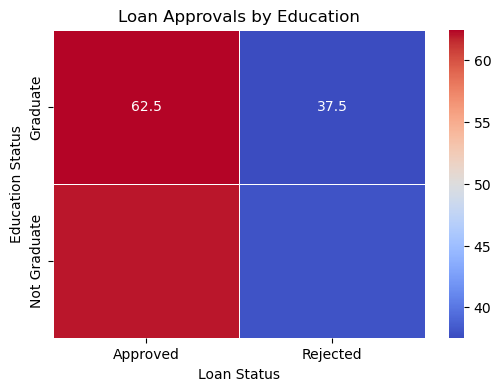

In [73]:
pivot_table = education.pivot(index='education', columns='loan_status', values=0)
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals, axis = 0) * 100

# Heatmap

plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

plt.title('Loan Approvals by Education')
plt.xlabel('Loan Status')
plt.ylabel('Education Status')

plt.show()

In [74]:
employment_type = df.groupby(['self_employed', 'loan_status']).size().reset_index()
employment_type = employment_type[employment_type['loan_status'].isin(['Approved', 'Rejected'])]
employment_type = employment_type.rename(columns={0:'Total'})

employment_type.head()

,self_employed,loan_status,Total
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


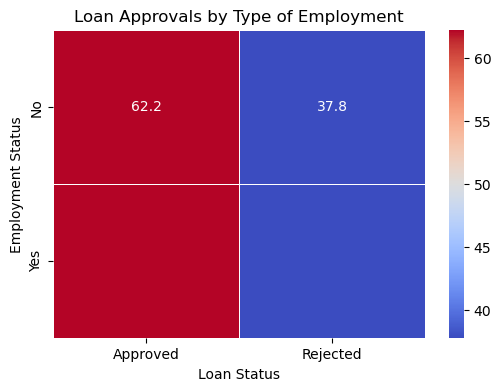

In [75]:
pivot_table = employment_type.pivot(index='self_employed', columns='loan_status', values='Total')
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals, axis = 0) * 100

# Heatmap

plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

plt.title('Loan Approvals by Type of Employment')
plt.xlabel('Loan Status')
plt.ylabel('Employment Status')

plt.show()

In [76]:
cibil_rates = df.groupby(['CIBIL Ratings', 'loan_status']).size().reset_index()
cibil_rates = cibil_rates.rename(columns={'loan_status' : 'Loan Status', 0 : 'Total'})

cibil_rates.head(9)

,CIBIL Ratings,Loan Status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


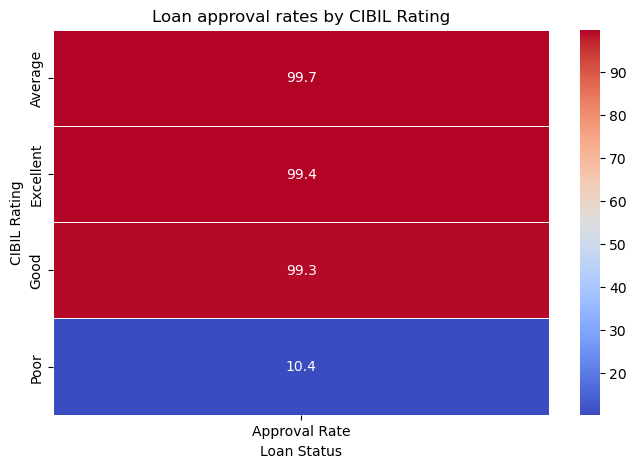

In [77]:
pivot_table = cibil_rates.pivot_table(index='CIBIL Ratings', columns = 'Loan Status', values='Total')
pivot_table['Approval Rate'] = pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) * 100

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table[['Approval Rate']], annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

plt.title('Loan approval rates by CIBIL Rating')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Rating')

plt.show()

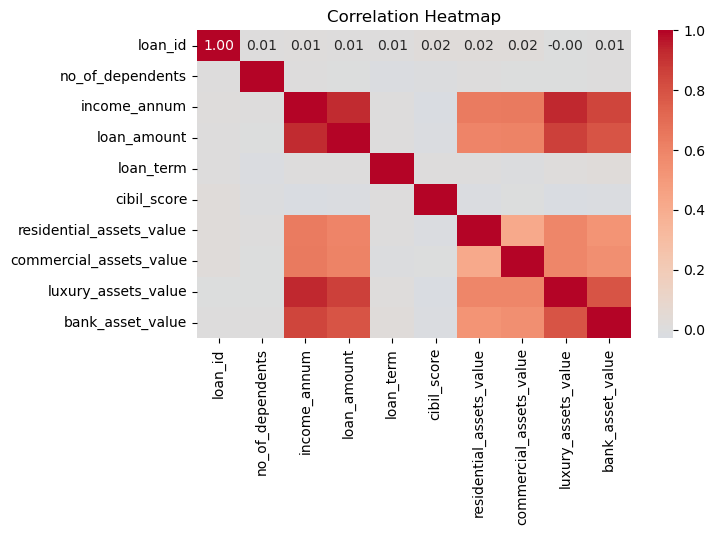

In [78]:
correlation_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')

plt.show()

In [79]:
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
income = 'income_annum'
correlations = df[assets + [income]].corr()

correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


In [80]:
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
loan = 'loan_amount'
correlations = df[assets + [loan]].corr()

correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


In [81]:
approved = df[df['loan_status'] == 'Approved']
rejected = df[df['loan_status'] == 'Rejected']

assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

for columns in assets:
    t_stat, p_value = ttest_ind(approved[columns], rejected[columns], equal_var=False)
    print(f"T-Test for {columns}:")
    print(f"T-Statistic for {t_stat}:")
    print(f"T-Value for {p_value}:")
    if p_value < 0.05:
        print(f" The difference in {columns} between approved and rejected loans is statistically significant")
    else:
        print(f" The difference in {columns} between approved and rejected loans is not statistically significant")


T-Test for residential_assets_value:
T-Statistic for -0.9399394365500209:
T-Value for 0.34731539500224484:
 The difference in residential_assets_value between approved and rejected loans is not statistically significant
T-Test for commercial_assets_value:
T-Statistic for 0.5387741456120381:
T-Value for 0.5900779272018964:
 The difference in commercial_assets_value between approved and rejected loans is not statistically significant
T-Test for luxury_assets_value:
T-Statistic for -1.013970039592796:
T-Value for 0.3106683217824068:
 The difference in luxury_assets_value between approved and rejected loans is not statistically significant
T-Test for bank_asset_value:
T-Statistic for -0.4448616890142232:
T-Value for 0.6564475917396153:
 The difference in bank_asset_value between approved and rejected loans is not statistically significant


In [82]:
# Null Hypothesis: There is no relation between assets value & income
# Alternative Hypothesis: There is a relationship between assets value & income

# Extracting values in columns

residential_assets = df['residential_assets_value']
commercial_assets = df['commercial_assets_value']
luxury_assets = df['luxury_assets_value']
bank_asset = df['bank_asset_value']
income = df['income_annum']

# perform ANOVA

f_statistic, p_value = f_oneway(residential_assets, commercial_assets, luxury_assets, bank_asset, income)

print('The f statistics:', f_statistic)
print('The p value is:', p_value)

# Interpretation of the results
if p_value < 0.05:
    print('There is a significant influence of income on asset value')
else:
    print('There is no significant influence of income on asset value')


The f statistics: 2518.654468935116
The p value is: 0.0
There is a significant influence of income on asset value


In [83]:
income = df['income_annum']
loan = df['loan_amount']

# perform ANOVA

t_stat, p_value = ttest_ind(income, loan, equal_var=True)

print('The f statistics:', t_stat)
print('The p value is:', p_value)

# Interpretation of the results
if p_value < 0.05:
    print('There is a significant difference in loan amount and income per annum')
else:
    print('There is no significant difference in loan amount and income per annum')


The f statistics: -69.51489699866843
The p value is: 0.0
There is a significant difference in loan amount and income per annum


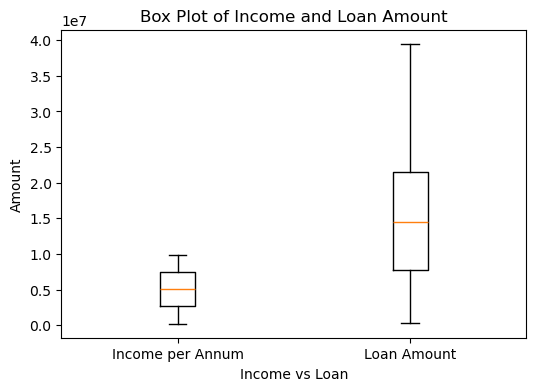

In [85]:
# Box Plot to represent correlation between income and loan amount

income = df['income_annum']
loan = df['loan_amount']

plt.figure(figsize=(6, 4))
ax = plt.axes()

ax.boxplot([income, loan], labels=['Income per Annum', 'Loan Amount'])

plt.xlabel('Income vs Loan')
plt.ylabel('Amount')
plt.title('Box Plot of Income and Loan Amount')

plt.show()

In [87]:
# Chi-Square Analysis: Determine correlation between loan status and number of dependents

# creating a contingency table
contingency_table = pd.crosstab(df['loan_status'], df['Dependent Levels'])

# perform chi-square
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('Chi-Square test statistic:', chi2)
print('The P-value is:', p_value)
print('The dof is:', dof)

# set the significance level
alpha = 0.05

if p_value < alpha:
    print('There is a statistically significant relationship between loan status and the number of dependents')
else:
    print('There is no statistically significant relationship between loan status and the number of dependents')


Chi-Square test statistic: 1.1296798036848839
The P-value is: 0.5684511474541935
The dof is: 2
There is no statistically significant relationship between loan status and the number of dependents


In [88]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings,Income levels,Loan Rating,Loan-Term Range,Dependent Levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [95]:
# Logistic Regression

def edu_status (status):
    if status == 'Graduate':
        return 1
    elif status == 'Not Graduate':
        return 0
    else:
        return 'unknown'
df['edu status'] = df['education'].apply(edu_status)

def type_employment (employment):
    if employment == 'Yes':
        return 1
    elif employment == 'No':
        return 0
df['Employment type'] = df['self_employed'].apply(type_employment)

def loan_approval (status):
    if status == 'Approved':
        return 1
    elif status == 'Rejected':
        return 0
df['Loan approval'] = df['loan_status'].apply(loan_approval)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,...,loan_status,CIBIL Ratings,Income levels,Loan Rating,Loan-Term Range,Dependent Levels,edu status,Employment type,Loan approval,Edu status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,...,Approved,Excellent,High,Gold,Intermediate,Moderate,1,0,1,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,...,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low,0,1,0,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,...,Rejected,Poor,High,Gold,Long-Term,Moderate,1,0,0,1
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,...,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0,0,1
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,...,Rejected,Poor,High,Gold,Long-Term,High,0,1,0,0


In [97]:
# separating the x-axis values

X = df.drop(columns={'loan_id', 'CIBIL Ratings', 'Income levels', 'Loan Rating', 'Loan-Term Range', 'Dependent Levels', 'Loan approval', 'loan_status', 'education', 'self_employed'})
X

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu status,Employment type,Edu status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,1,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,1,0
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,0,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,0,0


In [99]:
Y = df['Loan approval']
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: Loan approval, dtype: int64

In [100]:
# Importing logistic regression modules

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split

In [101]:
# split data to test & train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

In [102]:
X_train

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu status,Employment type,Edu status
4084,0,9300000,29400000,10,351,24200000,6800000,35800000,6100000,0,1,0
3556,5,5200000,20700000,2,538,3200000,2000000,14600000,3600000,1,0,1
2323,1,1900000,4500000,12,742,1200000,2000000,4400000,1200000,0,1,0
740,3,4100000,15900000,12,538,3900000,800000,8800000,5700000,0,0,0
1215,5,9600000,38000000,10,359,2100000,13600000,38200000,9400000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1646,0,5900000,20300000,4,806,300000,3700000,16400000,4800000,0,0,0
840,4,3500000,8900000,4,478,4000000,3900000,11300000,3800000,1,1,1
1144,1,8400000,24600000,14,817,1800000,13100000,31300000,8200000,0,0,0
48,3,5500000,20500000,12,634,800000,8600000,18500000,8200000,0,0,0


In [103]:
X_test

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu status,Employment type,Edu status
3133,4,700000,2300000,16,688,1500000,300000,1900000,400000,1,0,1
4053,1,7000000,20300000,14,837,7700000,2200000,19700000,5500000,0,1,0
610,3,8100000,23900000,10,449,7100000,6100000,28300000,8900000,1,0,1
3177,3,4900000,13100000,18,401,5700000,4100000,16400000,3600000,1,1,1
607,0,6000000,13100000,6,385,16600000,7600000,22000000,7400000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,2,5200000,13500000,2,777,7000000,5200000,15500000,6100000,1,0,1
804,2,800000,2100000,6,726,2000000,0,2600000,600000,0,1,0
4180,3,9700000,30800000,18,471,12700000,3800000,37300000,10400000,0,1,0
1078,5,9800000,37900000,18,301,6700000,4900000,34300000,6200000,0,1,0


In [104]:
# Scaling our data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
X_train_scaled

array([[-1.46148376,  1.48642509,  1.54664878, ..., -1.00268097,
         0.99266412, -1.00268097],
       [ 1.47642896,  0.02091063,  0.58652234, ...,  0.9973262 ,
        -1.00739009,  0.9973262 ],
       [-0.87390121, -1.15864979, -1.20129933, ..., -1.00268097,
         0.99266412, -1.00268097],
       ...,
       [-0.87390121,  1.16472679,  1.01692385, ..., -1.00268097,
        -1.00739009, -1.00268097],
       [ 0.30126387,  0.12814339,  0.56445046, ..., -1.00268097,
        -1.00739009, -1.00268097],
       [-0.87390121,  1.5579136 ,  0.50927078, ..., -1.00268097,
        -1.00739009, -1.00268097]])

In [106]:
X_test_scaled

array([[ 0.88884642, -1.58758085, -1.44408992, ...,  0.9973262 ,
        -1.00739009,  0.9973262 ],
       [-0.87390121,  0.66430722,  0.54237859, ..., -1.00268097,
         0.99266412, -1.00268097],
       [ 0.30126387,  1.05749403,  0.93967229, ...,  0.9973262 ,
        -1.00739009,  0.9973262 ],
       ...,
       [ 0.30126387,  1.62940211,  1.70115189, ..., -1.00268097,
         0.99266412, -1.00268097],
       [ 1.47642896,  1.66514636,  2.48470336, ..., -1.00268097,
         0.99266412, -1.00268097],
       [-0.28631867, -0.01483363,  0.15612082, ..., -1.00268097,
         0.99266412, -1.00268097]])

In [107]:
# Training the model

log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, Y_train)

In [108]:
# Predict

log_reg.predict(X_train_scaled)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [109]:
# Accuracy

log_reg.score(X_train_scaled, Y_train)

0.9200133868808568

In [110]:
# Application of model to new dataset

log_reg.score(X_test_scaled, Y_test)

0.912568306010929